<a href="https://colab.research.google.com/github/alagarde-bit/Data-Mining-and-Machine-Learning/blob/main/lab15_Lagarde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 15 Tensorflow
## CSC 401 Lab
## Alex Lagarde
### 4/14/21

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train =   X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

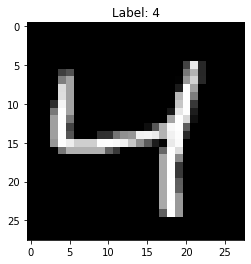

In [ ]:
train_idx = 2
plt.imshow(X_train[train_idx], cmap = 'gray')
plt.title('Label: {}'.format(y_train[train_idx]))
plt.show()

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [ ]:
predictions = model(X_train[:1]).numpy()
predictions

array([[-0.26291633, -0.12200274,  0.43952703,  0.44463465,  0.98143107,
        -0.10748328, -0.39566162, -0.12111012, -0.6341451 ,  0.28713766]],
      dtype=float32)

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.06540596, 0.07530352, 0.13203365, 0.13270973, 0.22700243,
        0.07640486, 0.05727521, 0.07537077, 0.04512266, 0.11337119]],
      dtype=float32)

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
model.compile(optimizer='adam',
              loss = loss_fn,
              metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=9)

Epoch 1/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5136 - accuracy: 0.8483
Epoch 2/9
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1650 - accuracy: 0.9512
Epoch 3/9
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1250 - accuracy: 0.9622
Epoch 4/9
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1004 - accuracy: 0.9697
Epoch 5/9
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0839 - accuracy: 0.9746
Epoch 6/9
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0731 - accuracy: 0.9767
Epoch 7/9
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0669 - accuracy: 0.9786
Epoch 8/9
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0613 - accuracy: 0.9802
Epoch 9/9
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0582 - accuracy: 0.9812


In [ ]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0691 - accuracy: 0.9807


[0.06908488273620605, 0.9807000160217285]

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()                                       
])

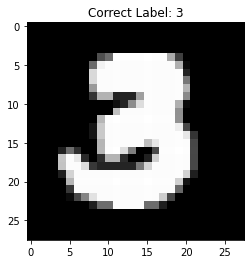

Predicted Probabilities:


<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[2.8748407e-05, 4.1608271e-07, 1.8586273e-03, 9.9730384e-01,
        3.4187337e-11, 7.1755721e-04, 5.4386939e-09, 2.2409692e-08,
        9.0741647e-05, 5.1872259e-08]], dtype=float32)>

In [ ]:
test_idx = 200
plt.imshow(X_test[test_idx], cmap = plt.cm.gray)
plt.title('Correct Label: {}'.format(y_test[test_idx]))
plt.show()
print('Predicted Probabilities:')
probability_model(X_test[test_idx:test_idx + 1])

### Questions

1. Using the training data on the original model, I was 91.1% accurate compared to 94.5% when using the testing data. 
2. The best accuracy I could get was 98.07% when I changed the amount of neurons to 100 and the amount of epochs to 9 without overfitting with a declining test accuracy
3. The training data accuracy is 98.12% and the testing data is 98.07%, which means the model could indeed be a bit underfit in fact. There could be more room for the testing data accuracy to grow even if the training data outperforms the testing data. The discrepancy is not enough evidence to suggest that the model is overfit. Through my step-by-step process, I did not observe the testing data accuracy decline. Whenever I saw a decline, I added more neurons or more epochs to increase it again. 